In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc


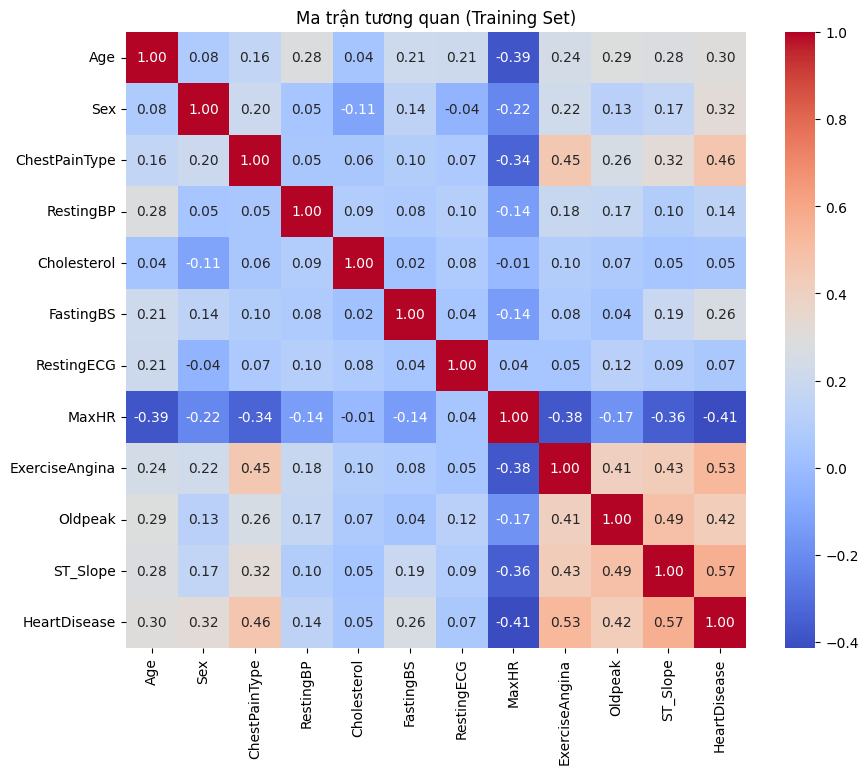

=== BẮT ĐẦU HUẤN LUYỆN ===
Vòng 0: Train Loss = 0.6931 - Test Loss: 0.6634
Vòng 100: Train Loss = 0.3677 - Test Loss: 0.4038
Vòng 200: Train Loss = 0.3626 - Test Loss: 0.3939
Vòng 300: Train Loss = 0.3619 - Test Loss: 0.3909
Vòng 400: Train Loss = 0.3617 - Test Loss: 0.3897
Vòng 500: Train Loss = 0.3617 - Test Loss: 0.3892
Vòng 600: Train Loss = 0.3617 - Test Loss: 0.3889
Vòng 700: Train Loss = 0.3617 - Test Loss: 0.3888
Vòng 800: Train Loss = 0.3617 - Test Loss: 0.3888
Vòng 900: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1000: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1100: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1200: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1300: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1400: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1500: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1600: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1700: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1800: Train Loss = 0.3617 - Test Loss: 0.3887
Vòng 1900: Train

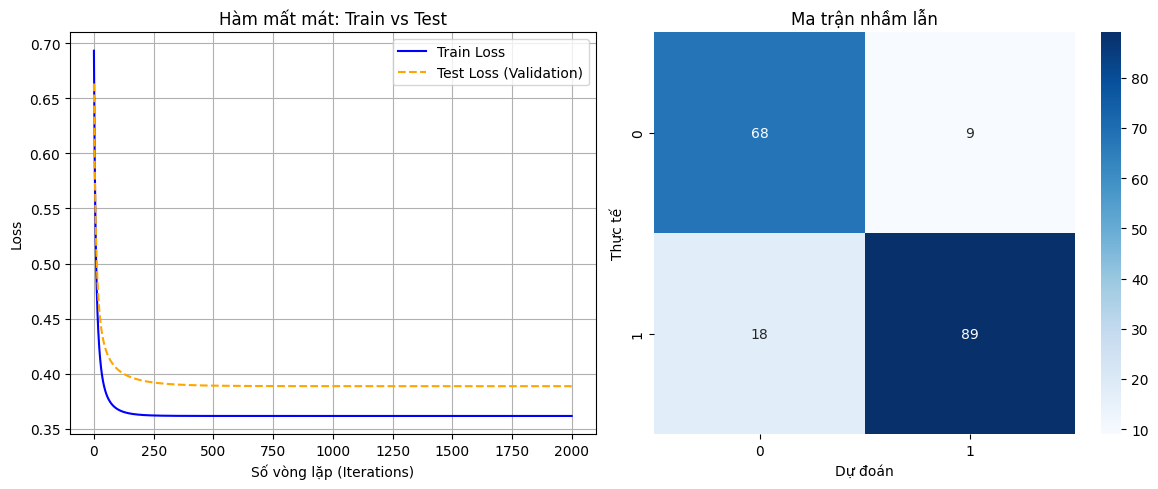

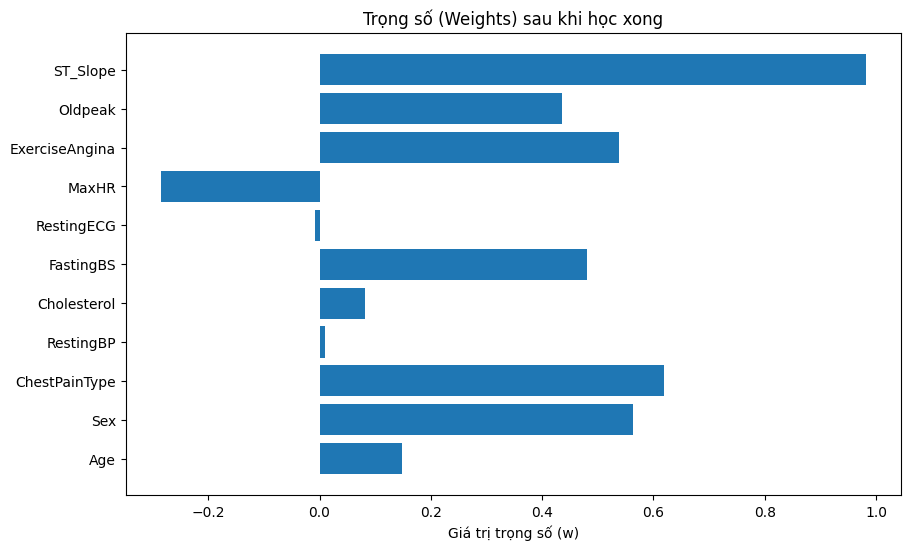

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==============================================================================
# PHẦN 1: CÀI ĐẶT THUẬT TOÁN (ĐÃ NÂNG CẤP ĐỂ THEO DÕI TEST LOSS)
# ==============================================================================

class LogisticRegressionTuCode:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.train_loss_history = [] # Đổi tên cho rõ: Loss của tập Train
        self.test_loss_history = []  # Mới: Loss của tập Test

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_predicted):
        m = len(y)
        loss = -(1/m) * np.sum(y * np.log(y_predicted + 1e-9) + (1-y) * np.log(1 - y_predicted + 1e-9))
        return loss

    # Sửa hàm fit: Nhận thêm X_test, y_test (tùy chọn)
    def fit(self, X, y, X_test=None, y_test=None):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        self.train_loss_history = []
        self.test_loss_history = []

        for i in range(self.n_iterations):
            # 1. Forward & Backward trên tập Train
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # 2. Update Parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # 3. Tính toán và lưu Loss (Train)
            loss_train = self._compute_loss(y, y_predicted)
            self.train_loss_history.append(loss_train)

            # 4. Tính toán và lưu Loss (Test) - MỚI
            if X_test is not None and y_test is not None:
                # Dùng trọng số hiện tại để dự đoán trên tập Test
                linear_test = np.dot(X_test, self.weights) + self.bias
                y_test_pred = self._sigmoid(linear_test)
                # Tính loss
                loss_test = self._compute_loss(y_test, y_test_pred)
                self.test_loss_history.append(loss_test)
            
            if i % 100 == 0:
                # In ra cả 2 loss để theo dõi
                test_msg = f" - Test Loss: {loss_test:.4f}" if X_test is not None else ""
                print(f"Vòng {i}: Train Loss = {loss_train:.4f}{test_msg}")

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_predicted_cls = [1 if i > threshold else 0 for i in self.predict_proba(X)]
        return np.array(y_predicted_cls)

# ==============================================================================
# PHẦN 2: XỬ LÝ DỮ LIỆU (GIỮ NGUYÊN NHƯ CŨ)
# ==============================================================================

data = pd.read_csv('heart.csv')

mapping_config = {
    'ChestPainType': {'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3},
    'RestingECG':    {'Normal': 0, 'ST': 1, 'LVH': 2},
    'ExerciseAngina':{'Y': 1, 'N': 0},
    'ST_Slope':      {'Up': 0, 'Flat': 1, 'Down': 2},
    'Sex':           {'M': 1, 'F': 0}
}
df_final = data.copy()
for col, mapping in mapping_config.items():
    df_final[col] = df_final[col].map(mapping)

df_final['Cholesterol'] = df_final['Cholesterol'].replace(0, np.nan)

X = df_final.drop('HeartDisease', axis=1).values
y = df_final['HeartDisease'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def fill_missing_value_scratch(X_train, X_test):
    X_train_filled = X_train.copy()
    X_test_filled = X_test.copy()
    n_features = X_train.shape[1]
    for i in range(n_features):
        col_train = X_train_filled[:, i]
        if np.isnan(col_train).any():
            median_val = np.nanmedian(col_train)
            X_train_filled[np.isnan(X_train_filled[:, i]), i] = median_val
            X_test_filled[np.isnan(X_test_filled[:, i]), i] = median_val
    return X_train_filled, X_test_filled

X_train, X_test = fill_missing_value_scratch(X_train, X_test)

# Vẽ ma trận tương quan
feature_names = df_final.drop('HeartDisease', axis=1).columns
df_train_plot = pd.DataFrame(X_train, columns=feature_names)
df_train_plot['HeartDisease'] = y_train
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_plot.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan (Training Set)")
plt.show()

def standard_scaler_scratch(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1 
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = standard_scaler_scratch(X_train, X_test)

# ==============================================================================
# PHẦN 3: HUẤN LUYỆN (CÓ TRUYỀN TẬP TEST VÀO)
# ==============================================================================

print("=== BẮT ĐẦU HUẤN LUYỆN ===")
model = LogisticRegressionTuCode(learning_rate=0.1, n_iterations=2000)

# QUAN TRỌNG: Truyền thêm X_test_scaled và y_test để tính Test Loss
model.fit(X_train_scaled, y_train, X_test=X_test_scaled, y_test=y_test)

# Dự đoán
y_pred = model.predict(X_test_scaled)

print("\n=== KẾT QUẢ ĐÁNH GIÁ ===")
print(f"Độ chính xác (Accuracy): {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# ==============================================================================
# PHẦN 4: VẼ BIỂU ĐỒ LOSS (TRAIN vs TEST) - MỚI
# ==============================================================================

plt.figure(figsize=(12, 5))

# Biểu đồ 1: Loss History
plt.subplot(1, 2, 1)
plt.plot(model.train_loss_history, label='Train Loss', color='blue')
plt.plot(model.test_loss_history, label='Test Loss (Validation)', color='orange', linestyle='--')
plt.title('Hàm mất mát: Train vs Test')
plt.xlabel('Số vòng lặp (Iterations)')
plt.ylabel('Loss')
plt.legend() # Hiển thị chú thích
plt.grid(True)

# Biểu đồ 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')

plt.tight_layout()
plt.show()

# Biểu đồ 3: Weights
plt.figure(figsize=(10, 6))
plt.barh(feature_names, model.weights)
plt.title('Trọng số (Weights) sau khi học xong')
plt.xlabel('Giá trị trọng số (w)')
plt.show()


=== KẾT QUẢ TỐI ƯU (Ngưỡng 0.3) ===
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        77
           1       0.88      0.91      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



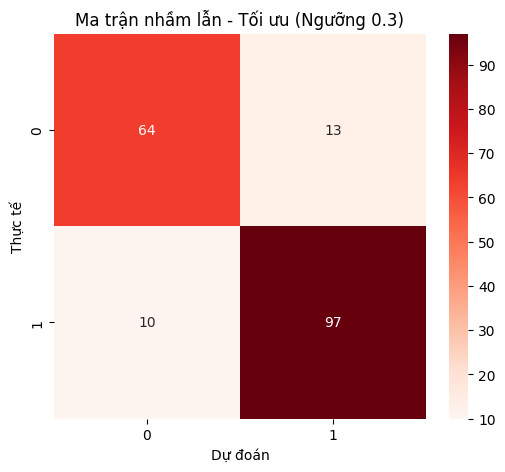

In [66]:
# --- BƯỚC 7: TỐI ƯU HÓA NGƯỠNG (THRESHOLD TUNING) ---

# Lấy xác suất dự đoán thay vì nhãn 0/1
y_prob = model.predict_proba(X_test_scaled)

# Đặt ngưỡng mới an toàn hơn (0.3)
new_threshold = 0.3
y_pred_new = (y_prob >= new_threshold).astype(int)

print(f"\n=== KẾT QUẢ TỐI ƯU (Ngưỡng {new_threshold}) ===")
print(classification_report(y_test, y_pred_new))

# Vẽ Confusion Matrix so sánh
plt.figure(figsize=(6, 5))
cm_new = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Reds')
plt.title(f'Ma trận nhầm lẫn - Tối ưu (Ngưỡng {new_threshold})')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()


=== HUẤN LUYỆN LẠI VỚI TRỌNG SỐ {0: 1, 1: 3} (MANUAL CODE) ===
Báo cáo chi tiết (Weighted Model - From Scratch):
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        77
           1       0.87      0.93      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



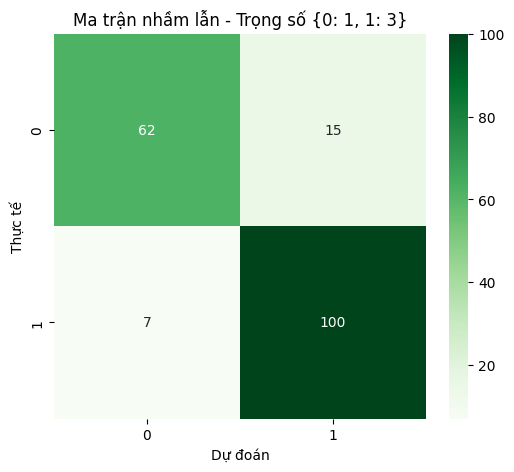

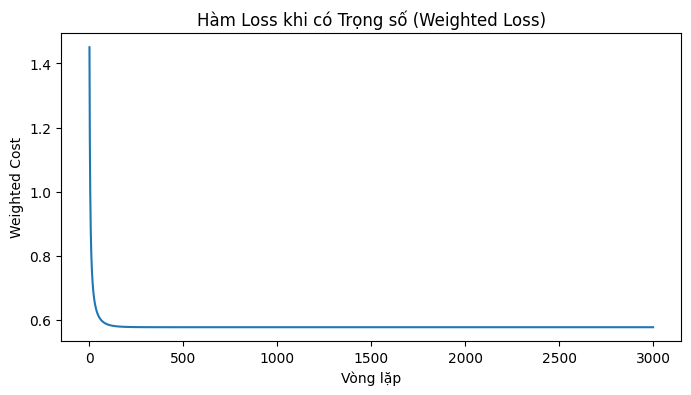

In [67]:
class LogisticRegressionWeighted(LogisticRegressionTuCode): # Kế thừa class cũ hoặc viết mới
    def __init__(self, learning_rate=0.01, n_iterations=1000, class_weight=None):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        self.class_weight = class_weight # Thêm tham số nhận trọng số {0: 1, 1: 3}

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_predicted, sample_weights):
        m = len(y)
        # Loss có nhân thêm trọng số từng dòng
        loss = -(1/m) * np.sum(sample_weights * (y * np.log(y_predicted + 1e-9) + (1-y) * np.log(1 - y_predicted + 1e-9)))
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # --- XỬ LÝ TRỌNG SỐ ---
        # Tạo một vector trọng số cho từng mẫu dữ liệu
        # Nếu class_weight={0:1, 1:3}, thì ai nhãn 0 có w=1, ai nhãn 1 có w=3
        if self.class_weight is not None:
            sample_weights = np.ones(n_samples)
            for cls, weight in self.class_weight.items():
                sample_weights[y == cls] = weight
        else:
            sample_weights = np.ones(n_samples) # Mặc định trọng số là 1 hết

        for i in range(self.n_iterations):
            # Forward
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # --- Backward (Đạo hàm có trọng số) ---
            # Công thức gốc: error = y_predicted - y
            # Công thức weighted: error = (y_predicted - y) * sample_weight
            # Ý nghĩa: Nếu mẫu quan trọng (weight lớn) đoán sai -> Error bị nhân lên gấp bội -> Gradient lớn -> Học nhanh hơn
            error = (y_predicted - y) * sample_weights
            
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            # Update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = self._compute_loss(y, y_predicted, sample_weights)
            self.cost_history.append(loss)
            
    # Giữ nguyên hàm predict
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_predicted_cls = [1 if i > threshold else 0 for i in self.predict_proba(X)]
        return np.array(y_predicted_cls)
    
# --- BƯỚC 8: CÁCH 2 - SỬ DỤNG TRỌNG SỐ LỚP (CODE THỦ CÔNG) ---

# Định nghĩa trọng số: {0: 1, 1: 3}
custom_weights = {0: 1, 1: 3}

print(f"\n=== HUẤN LUYỆN LẠI VỚI TRỌNG SỐ {custom_weights} (MANUAL CODE) ===")

# 1. Khởi tạo mô hình TỰ VIẾT với tham số class_weight
# Lưu ý: Vì ta tự code nên không có random_state, kết quả có thể hơi khác sklearn chút xíu do cách khởi tạo w=0
model_weighted = LogisticRegressionWeighted(learning_rate=0.1, n_iterations=3000, class_weight=custom_weights)

# 2. Huấn luyện lại
model_weighted.fit(X_train_scaled, y_train)

# 3. Dự đoán
# Với trọng số 1:3, ta có thể dùng lại ngưỡng 0.5
y_pred_weighted = model_weighted.predict(X_test_scaled, threshold=0.5)

# 4. In báo cáo
print("Báo cáo chi tiết (Weighted Model - From Scratch):")
print(classification_report(y_test, y_pred_weighted))

# 5. Vẽ Confusion Matrix so sánh
plt.figure(figsize=(6, 5))
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Greens')
plt.title(f'Ma trận nhầm lẫn - Trọng số {custom_weights}')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

# 6. (Optional) Vẽ biểu đồ Loss để xem nó học thế nào khi bị "ép" học nặng hơn
plt.figure(figsize=(8, 4))
plt.plot(model_weighted.cost_history)
plt.title('Hàm Loss khi có Trọng số (Weighted Loss)')
plt.xlabel('Vòng lặp')
plt.ylabel('Weighted Cost')
plt.show()


=== KẾT QUẢ KẾT HỢP: CLASS WEIGHT + THRESHOLD 0.3 ===
              precision    recall  f1-score   support

           0       0.87      0.52      0.65        77
           1       0.73      0.94      0.82       107

    accuracy                           0.77       184
   macro avg       0.80      0.73      0.74       184
weighted avg       0.79      0.77      0.75       184



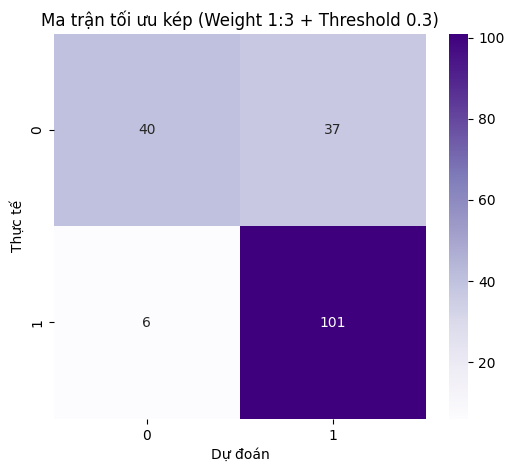

In [68]:
# --- BƯỚC 9: KẾT HỢP CẢ 2 PHƯƠNG PHÁP (ULTIMATE OPTIMIZATION) ---
# Chiến lược:
# 1. Train model với trọng số {0: 1, 1: 3} để AI học cách sợ bỏ sót bệnh.
# 2. Sau đó tiếp tục hạ ngưỡng xuống 0.35 để rà soát kỹ lần cuối.

print(f"\n=== KẾT QUẢ KẾT HỢP: CLASS WEIGHT + THRESHOLD 0.3 ===")

# 1. Lấy xác suất từ mô hình đã gán trọng số (model_weighted ở Bước 8)
# Lưu ý: model_weighted đã được train với class_weight={0:1, 1:3}
y_prob_weighted = model_weighted.predict_proba(X_test_scaled,)

# 2. Áp dụng ngưỡng mới trên mô hình này
final_threshold = 0.3
y_pred_combined = (y_prob_weighted >= final_threshold).astype(int)

# 3. Đánh giá độ hiệu quả
print(classification_report(y_test, y_pred_combined))

# 4. Vẽ Confusion Matrix cuối cùng
plt.figure(figsize=(6, 5))
cm_combined = confusion_matrix(y_test, y_pred_combined)
# Dùng màu Tím (Purples) cho phiên bản mạnh nhất
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Purples')
plt.title(f'Ma trận tối ưu kép (Weight 1:3 + Threshold {final_threshold})')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

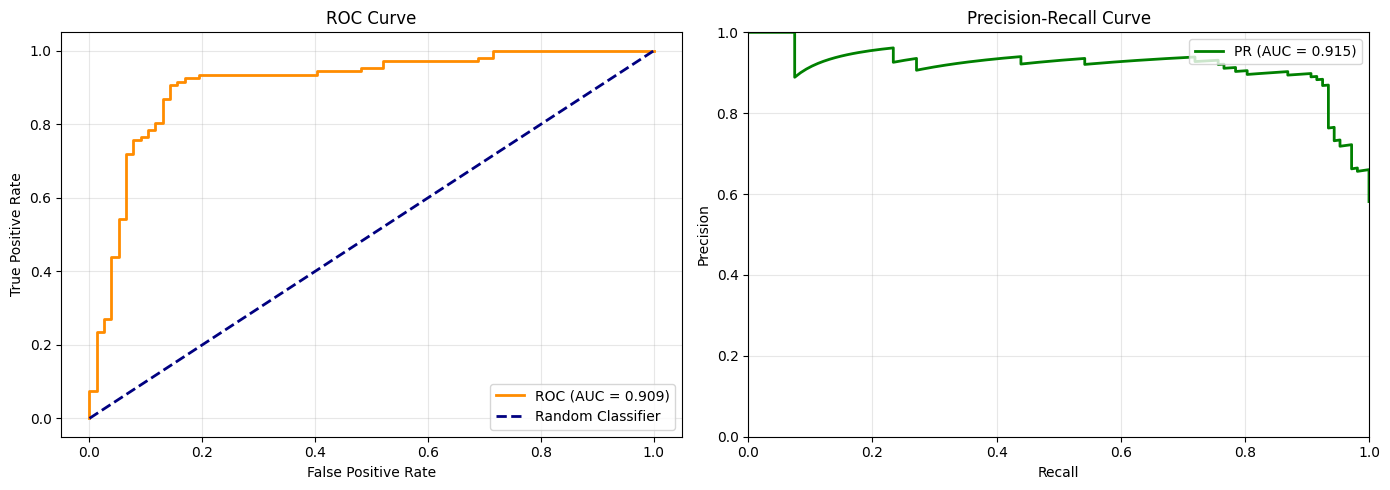

AUC-ROC: 0.9092
AUC-PR: 0.9153


In [71]:
# --- BƯỚC 11: VẼ ROC-CURVE & PRECISION-RECALL CURVE ---
# Để hiểu rõ hơn mô hình, cần xem thêm các metrics khác ngoài Accuracy

from sklearn.metrics import precision_recall_curve, auc as pr_auc

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ========== ROC CURVE ==========
# Cao càng tốt (nằm gần góc trên trái). Diện tích dưới đường = AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_weighted)
roc_auc = auc(fpr, tpr)

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc="lower right")
axes[0].grid(alpha=0.3)

# ========== PRECISION-RECALL CURVE ==========
# Dùng khi dữ liệu imbalanced (một class ít hơn rất nhiều)
# Cao càng tốt (nằm gần góc trên phải)
precision, recall, _ = precision_recall_curve(y_test, y_prob_weighted)
pr_auc_score = pr_auc(recall, precision)

axes[1].plot(recall, precision, color='green', lw=2, label=f'PR (AUC = {pr_auc_score:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="upper right")
axes[1].grid(alpha=0.3)
axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

print(f"AUC-ROC: {roc_auc:.4f}")
print(f"AUC-PR: {pr_auc_score:.4f}")